On this project i will build a CNN, that can make a difference between a Cat and a Dog. This is a project is made to teach me some methods of pooling and flattening that the CNN methods use.

# Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D # first step of convolution to build the feature mapping
from keras.layers import MaxPooling2D # to maxpool.
from keras.layers import Flatten # step3 to flatten our matrix.
from keras.layers import Dense # to add fully connected layers.
from keras.layers import BatchNormalization
from keras.layers import Dropout

Using TensorFlow backend.


# CNN BUILD

## Initalisation

It's just like a simple ANN to initalize, we build de classifier

In [2]:
classifier=Sequential()

## Convolution

after that we build the convolution layer. This is the layer where we build our feature maps, by translating our input img , into multiple matrixs.
By using Convolution2D rather than Dense, to build our feature maps.
- filter: the number of features we want. (32 is a standard on the first layer) if we make another convolutional layer we would double the filter value.
- kernel_size: the matrix dimension of the feature detector, in our case we choose a 3x3 matrix. so a simple 3 value.
- stride: the amount of pixel we move the feature detector.

- input_shape: to specify the shape of our imgs, (width,height,3) if RGB and (width,height,1) if B&W. We will adapt our imgs to the specified width and height. In our case (64,64,3).
- activation: the activation function we use "relu" because handling imgs is non linear, which makes relu a better option


In [3]:
classifier.add(Convolution2D(filters=32,kernel_size=3,strides=1,input_shape=(150,150,3),activation="relu"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Pooling

In this step we reduce every feature map, into a smaller matrix, to make it easier to process. Creating the so called Pooling Layer. if we don't do it we will have WAY TO MUCH features.
- pool_size: the dimension of the 'feature detector' in our case 2x2 . the strides will have the default value of 2 in this case.

In [4]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

## (added 2 onvolutional layers to make better prediction)

in this case we don't need input_shape, because we already adapted our imgs the first time.

In [5]:
classifier.add(Convolution2D(filters=32,kernel_size=3,strides=1,activation="relu"))

we add a MAXPOOL for this case too.

In [6]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
classifier.add(Convolution2D(filters=32,kernel_size=3,strides=1,activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))

## Flattening

We take all our pooled feature maps and align them to make the Entry layer for our ANN. Since now the structures of the img are represented as a high number, we can identify them as features for our entry layer.

In [8]:
classifier.add(Flatten())

Now we just need to build a simple ANN.

## ANN build.

We create a hidden layer. I choose the units=128 because we need high enough value for the amount of features.

In [9]:
classifier.add(Dense(units=128,activation="relu"))
classifier.add(Dropout(rate=0.5))
classifier.add(Dense(units=128,activation="relu"))
classifier.add(Dropout(rate=0.5))
classifier.add(Dense(units=128,activation="relu"))
classifier.add(Dropout(rate=0.5))

We build now the exit layer. Since this project is a classification of 2 possible outcomes, it would be wise to use the sigmoid activation function. (if we had multiple outcomes we could use the softmax function.)

In [10]:
classifier.add(Dense(units=1,activation="sigmoid"))

now we compile the classifier.

In [11]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# FIT the CNN to our imgs.

we need to fit the cnn to our imgs. We will use a technique that is called img augmentation, it prepares our imgs to reduce the risk of OVERFITTING to nothingness. Because to train a model, wee need a lot of imgs, this technique creates new imgs based on our current imgs.(for example just turn a img upside down.) The function is called : Flow_from_directory() we copy the functions from the keras library.

In [12]:
from keras.preprocessing.image import ImageDataGenerator

the steps per epoch is the value of the imgs divided by the bach size : wich makes in our case 8000 / 32 = 250, so we give it 250. for validation step we have 2000 imgs divided by 32 == 63.

In [13]:
train_datagen = ImageDataGenerator(
        rescale=1./255, # change the scale value of every  (just like the standardization)
        shear_range=0.2,# to make transvection = change the angle of which you see the img
        zoom_range=0.2,
        horizontal_flip=True) # to turn the img horizontaly.

test_datagen = ImageDataGenerator(rescale=1./255) #we change everything on the same scale.

# creates the new imgs.

training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 8000 images belonging to 2 classes.


for unknown reasons in google colab we find only 3270 images

In [14]:
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.


for unknown reasons in google colab we find 0 images

# trains the model and measures his performance.


In [15]:
classifier.fit(
        training_set,
        steps_per_epoch=250, #everytime we reajust the epochs
        epochs=100,
        validation_data=test_set,
        validation_steps=63)


Epoch 1/100
250/250 [==============================] - 73s 291ms/step - loss: 0.6943 - accuracy: 0.4980 - val_loss: 0.6961 - val_accuracy: 0.5010
Epoch 2/100
250/250 [==============================] - 70s 281ms/step - loss: 0.6895 - accuracy: 0.5289 - val_loss: 0.6858 - val_accuracy: 0.5430
Epoch 3/100
250/250 [==============================] - 70s 278ms/step - loss: 0.6788 - accuracy: 0.5705 - val_loss: 0.6751 - val_accuracy: 0.6090
Epoch 4/100
250/250 [==============================] - 73s 290ms/step - loss: 0.6542 - accuracy: 0.6237 - val_loss: 0.7074 - val_accuracy: 0.6685
Epoch 5/100
250/250 [==============================] - 72s 287ms/step - loss: 0.6285 - accuracy: 0.6603 - val_loss: 0.4308 - val_accuracy: 0.6725
Epoch 6/100
250/250 [==============================] - 72s 288ms/step - loss: 0.5947 - accuracy: 0.6896 - val_loss: 0.5484 - val_accuracy: 0.7225
Epoch 7/100
250/250 [==============================] - 73s 292ms/step - loss: 0.5660 - accuracy: 0.7120 - val_loss: 0.5953 

250/250 [==============================] - 73s 292ms/step - loss: 0.2352 - accuracy: 0.9056 - val_loss: 0.3790 - val_accuracy: 0.8435
Epoch 56/100
250/250 [==============================] - 72s 290ms/step - loss: 0.2241 - accuracy: 0.9105 - val_loss: 0.2745 - val_accuracy: 0.8320
Epoch 57/100
250/250 [==============================] - 71s 284ms/step - loss: 0.2274 - accuracy: 0.9055 - val_loss: 0.2593 - val_accuracy: 0.8385
Epoch 58/100
250/250 [==============================] - 72s 288ms/step - loss: 0.2253 - accuracy: 0.9090 - val_loss: 0.3659 - val_accuracy: 0.8435
Epoch 59/100
250/250 [==============================] - 72s 287ms/step - loss: 0.2222 - accuracy: 0.9072 - val_loss: 0.5517 - val_accuracy: 0.8415
Epoch 60/100
250/250 [==============================] - 72s 290ms/step - loss: 0.2318 - accuracy: 0.9020 - val_loss: 0.1215 - val_accuracy: 0.8400
Epoch 61/100
250/250 [==============================] - 74s 296ms/step - loss: 0.2228 - accuracy: 0.9129 - val_loss: 0.3729 - val_a

this takes a long time....(first run without the 2 new convolutional layer) 0.76 is not very high in my point of view, so i will add some convolutional layers... (ps at first i used only one convolutional layer, now i use 3.) 

accuracy_test_data = 80.65% . Thats bretty good.

# Test on a new image

At first we need to identify which class is which, because the prediction will send us a value, and we wouldn't know what is what...

In [16]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

Now we test it on a new image that it has never seen before. So we take a new image and adapt it to the size and form that our model can take. Wich means 64x64.

In [17]:
from keras.preprocessing import image

We load the specific image, with the desired size.

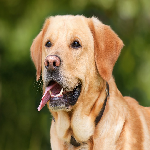

In [23]:
img=image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',target_size=(150,150))
img

so this is a dog. Ok let's see if the model recognize it.

We need to transform it into an array so that the model can understand it.

In [24]:
img=image.img_to_array(img)

we need to add a dimension because the model needs 4 dimensions, the 4th represends groups, groups of images where only specific images belong.

In [25]:
img=img.reshape((1,)+img.shape) # we could also use np.expand_dims(img,axis=0)

We don't forget to standardize our image.

In [26]:
img=img/255

Now we predict.

In [27]:
classifier.predict_classes(img)

array([[1]])

IT's a DOG !

Let's try for another img. A cat This time:

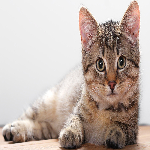

In [30]:
img=image.load_img('dataset/single_prediction/cat_or_dog_2.jpg',target_size=(150,150))
img

In [31]:
img=image.img_to_array(img)
img=img.reshape((1,)+img.shape) # we could also use np.expand_dims(img,axis=0)
img=img/255
classifier.predict_classes(img)

array([[0]])

IT'S A CAT !

we realize that with an accuracy of 95% on our training Data, and 83% on our test data, our model suffers of overfitting.. so i need to work on it to optimize it.